In [0]:
#how many percentage of ml/data scientist are there in stackoverflow
#average salary of data scientist and machine learning engineer
#how frequently they contribute to open source.
#does ml/data scientist are happy with there job profile 
#what machine learnig just to enter into the field


In [0]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

In [0]:
#getting server data
survey_data = pd.read_csv(r'/content/survey_results_public.csv')

In [5]:
survey_data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on what se...,Distracting work environment;Inadequate access...,Less than once per month / Never

In [0]:
def get_dummy(df , col_name):
  """
  It gives new DataFrame
  Args
    Input - dataframe , column_name
    return new data using pd.dummies 
  """
  new_df = pd.get_dummies(df[col_name])
  return new_df


In [0]:
def help_ploting(df,highlight=12):
  """Helper function to plot
  Args:
    Input:Dataframe,highlight to a certain bar
    Return None
  """
  total = []
  for col in df.columns:
    total.append(np.round(df[col].sum()/df[col].shape[0]*100,2))
  df_new = pd.DataFrame({
    'lab':df.columns,
    'val':total
    })
  df_c = df_new.sort_values('val')
  y = np.array(df_c['val'])
  fig = matplotlib.pyplot.gcf()
  fig.set_size_inches(18.5, 10.5)
  bar = plt.barh(df_c['lab'],df_c['val'],color = 'aqua')
  bar[highlight].set_color('dodgerblue')
  
  for index, value in enumerate(y):
    plt.text(value, index, str(value))

Text(0, 0.5, 'Dev. Type')

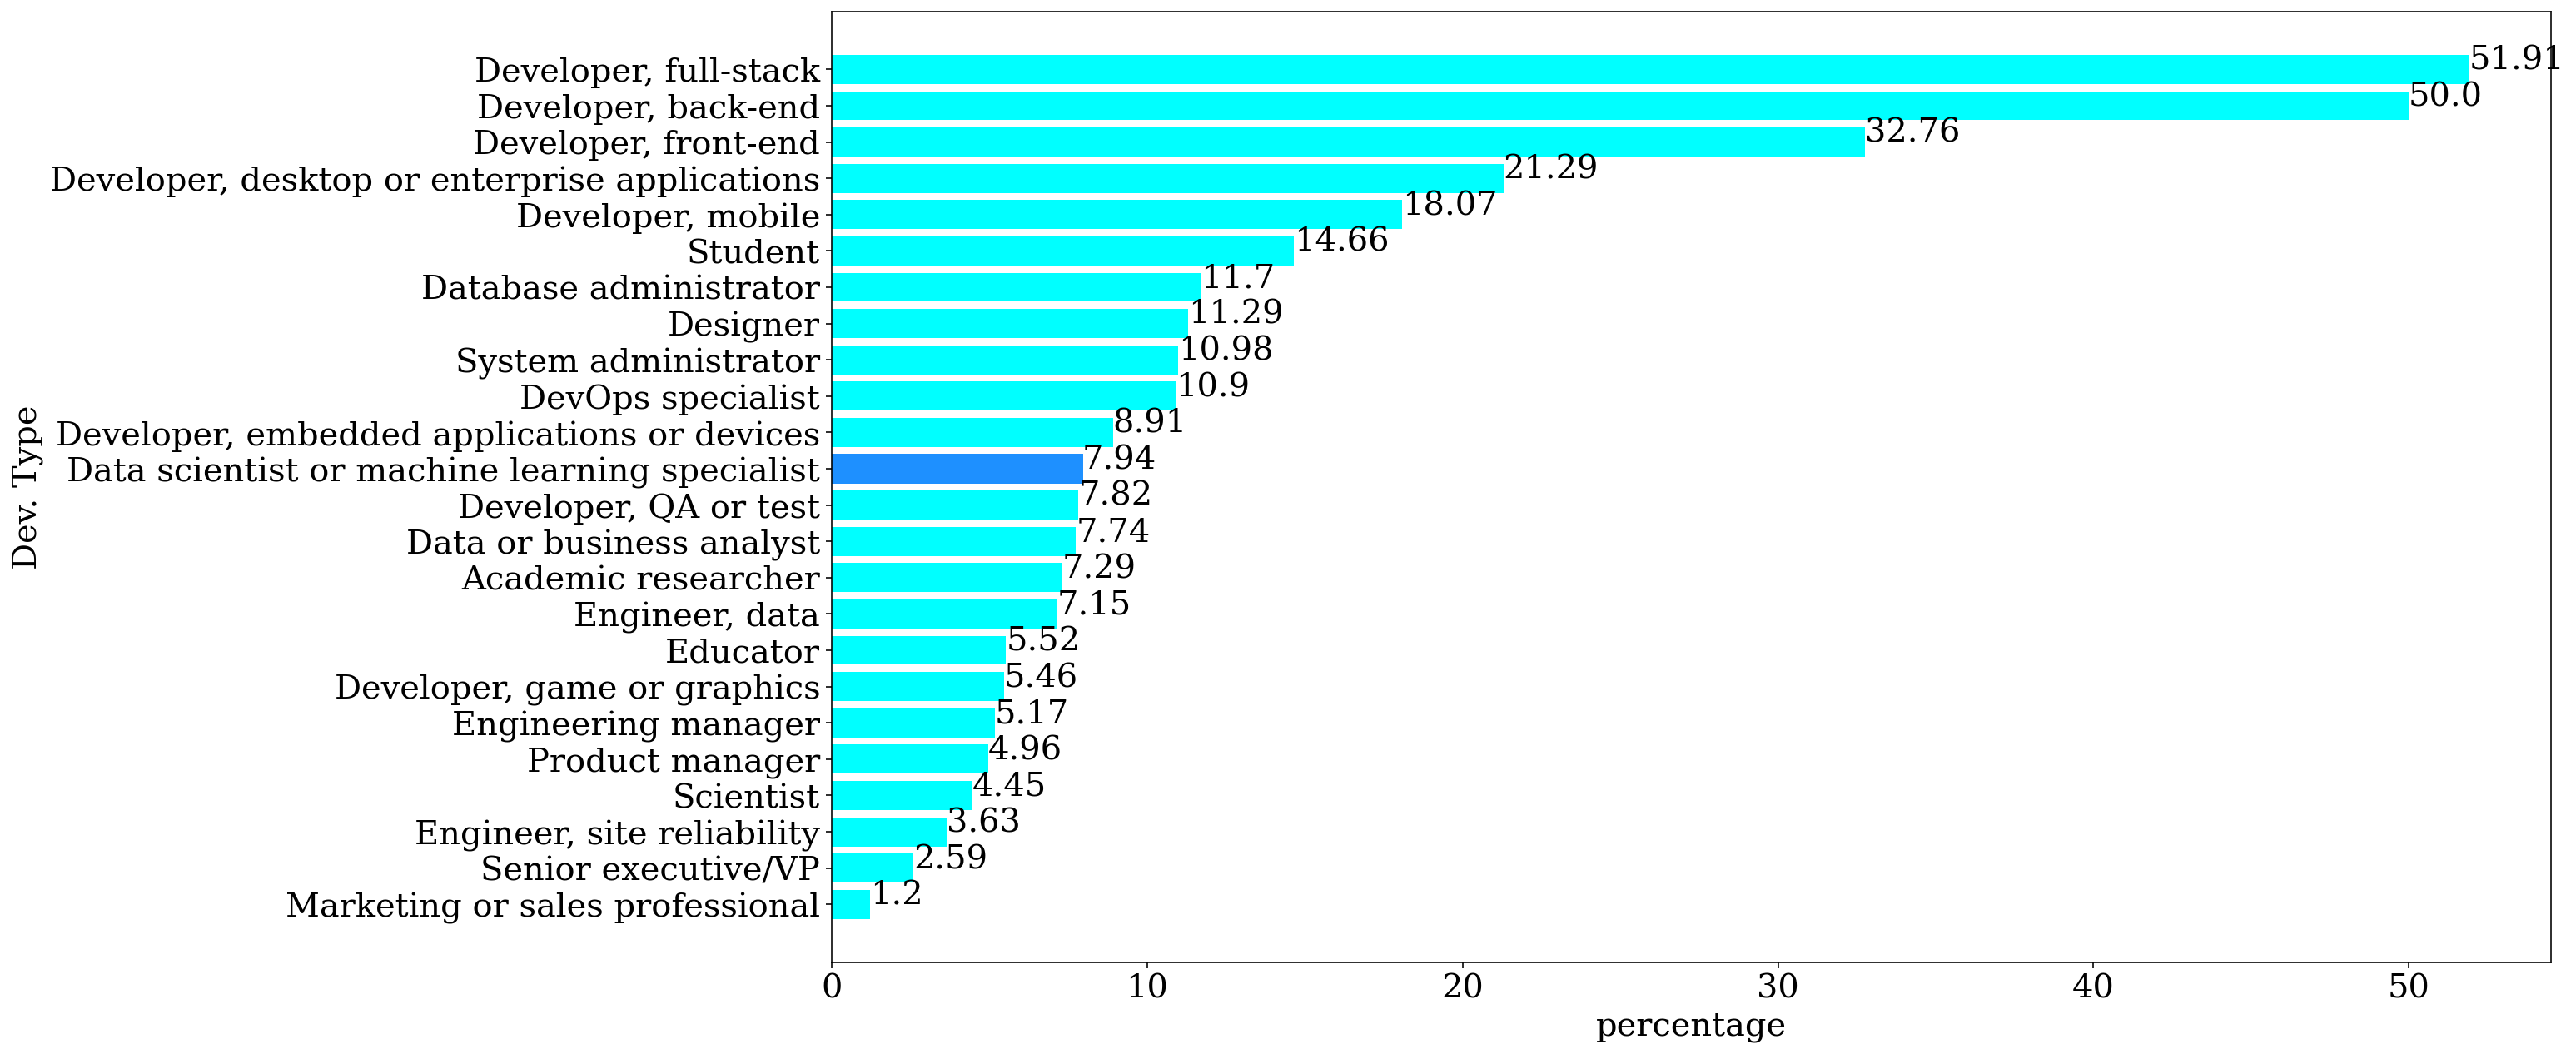

In [38]:
devtype_df = pd.get_dummies(survey_data['DevType'].str.split(';', expand=True).stack()).sum(level=0)
help_ploting(devtype_df)
plt.xlabel("percentage")
plt.ylabel("Dev. Type")

In [0]:
ds_ml_idx = devtype_df[devtype_df["Data scientist or machine learning specialist"]==1].index.values

In [0]:
ds_ml_df = survey_data.iloc[ds_ml_idx]

In [21]:
ds_ml_df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,Taken an online course in programming or softw...,NaN,Data or business analyst;Data scientist or mac...,13,15,3,Very satisfied,Slightly satisfied,Very confident,No,Yes,I am not interested in new job opportunities,1-2 years ago,Write any code;Complete a take-home project;In...,No,Financial performance or funding status of the...,I heard about a job opportunity (from a recrui...,CAD,Canadian dollar,40000.0,Monthly,366420.0,15.0,There's no schedule or spec; I work on what se...,NaN,A few days each month,Home,A little above average,No,NaN,...,MongoDB;PostgreSQL,PostgreSQL,Android;Google Cloud Platform;Linux;Windows,Android;Google Cloud Platform;Linux;Windows,NaN,NaN,Hadoop,Hadoop;Pandas;TensorFlow;Unity 3D,Android Studio;Eclipse;PyCharm;RStudio;Visual ...,Windows,I do not use containers,Not at all,NaN,No,Yes,No,YouTube,In real life (in person),Login,2011,A few times per month or weekly,Find answers to specific questions,Less than once per week,Stack Overflow was slightly faster,60+ minutes,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
9,10,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN,"10,000 or more employees",Data or business analyst;Data scientist or mac...,12,20,10,Slightly dissatisfied,Slightly dissatisfied,Somewhat confident,Yes,Yes,"I’m not actively looking, but I am open to new...",3-4 years ago,NaN,No,"Languages, frameworks, and other technologies ...",NaN,INR,Indian rupee,950000.0,Yearly,13293.0,70.0,There's no schedule or spec; I work on what se...,NaN,A few days each month,Home,Far above average,"Yes, because I see value in code review",4.0,...,Elasticsearch;MongoDB;Microsoft SQL Server;MyS...,Elasticsearch;MongoDB;Microsoft SQL Server,Linux;Windows,Android;Linux;Raspberry Pi;Windows,Angular/Angular.js;ASP.NET;Django;Express;Flas...,Angular/Angular.js;ASP.NET;Django;Express;Flas...,.NET;Node.js;Pandas;Torch/PyTorch,.NET;Node.js;TensorFlow;Torch/PyTorch,Android Studio;Eclipse;IPython / Jupyter;Notep...,Windows,NaN,Not at all,Useful for immutable record keeping outside of...,No,Yes,Yes,YouTube,Neither,Screen Name,NaN,Multiple times per day,Find answers to specific questions;Get a sense...,3-5 times per week,They were about the same,NaN,Yes,A few times per month or weekly,Yes,"No, and I don't know what those are","Yes, somewhat",Somewhat less welcome now than last year,Tech articles written by other developers;Tech...,NaN,NaN,NaN,NaN,NaN,Yes,Too long,Difficult
11,12,I am a student wh

In [0]:
#Missing Values

In [0]:
missing_df = pd.DataFrame(ds_ml_df.isnull().sum())

In [89]:
missing_df.loc[['Hobbyist']]
#No missing values no  need

,0
Hobbyist,0


In [90]:
missing_df.loc[['OpenSourcer']]
#No missing values no  need

,0
OpenSourcer,0


In [91]:
missing_df.loc[['WorkWeekHrs']]
#Very less  missing values approx 10% no need

,0
WorkWeekHrs,1585


In [92]:
missing_df.loc[['JobSat']]
#Very less  missing values approx less than 10% no need

,0
JobSat,1083


In [94]:
missing_df.loc[['CareerSat']]

#Very less  missing values approx less than 10% no need

,0
CareerSat,894


Are the Data Scientist or machine learning satisfied with their job or career?

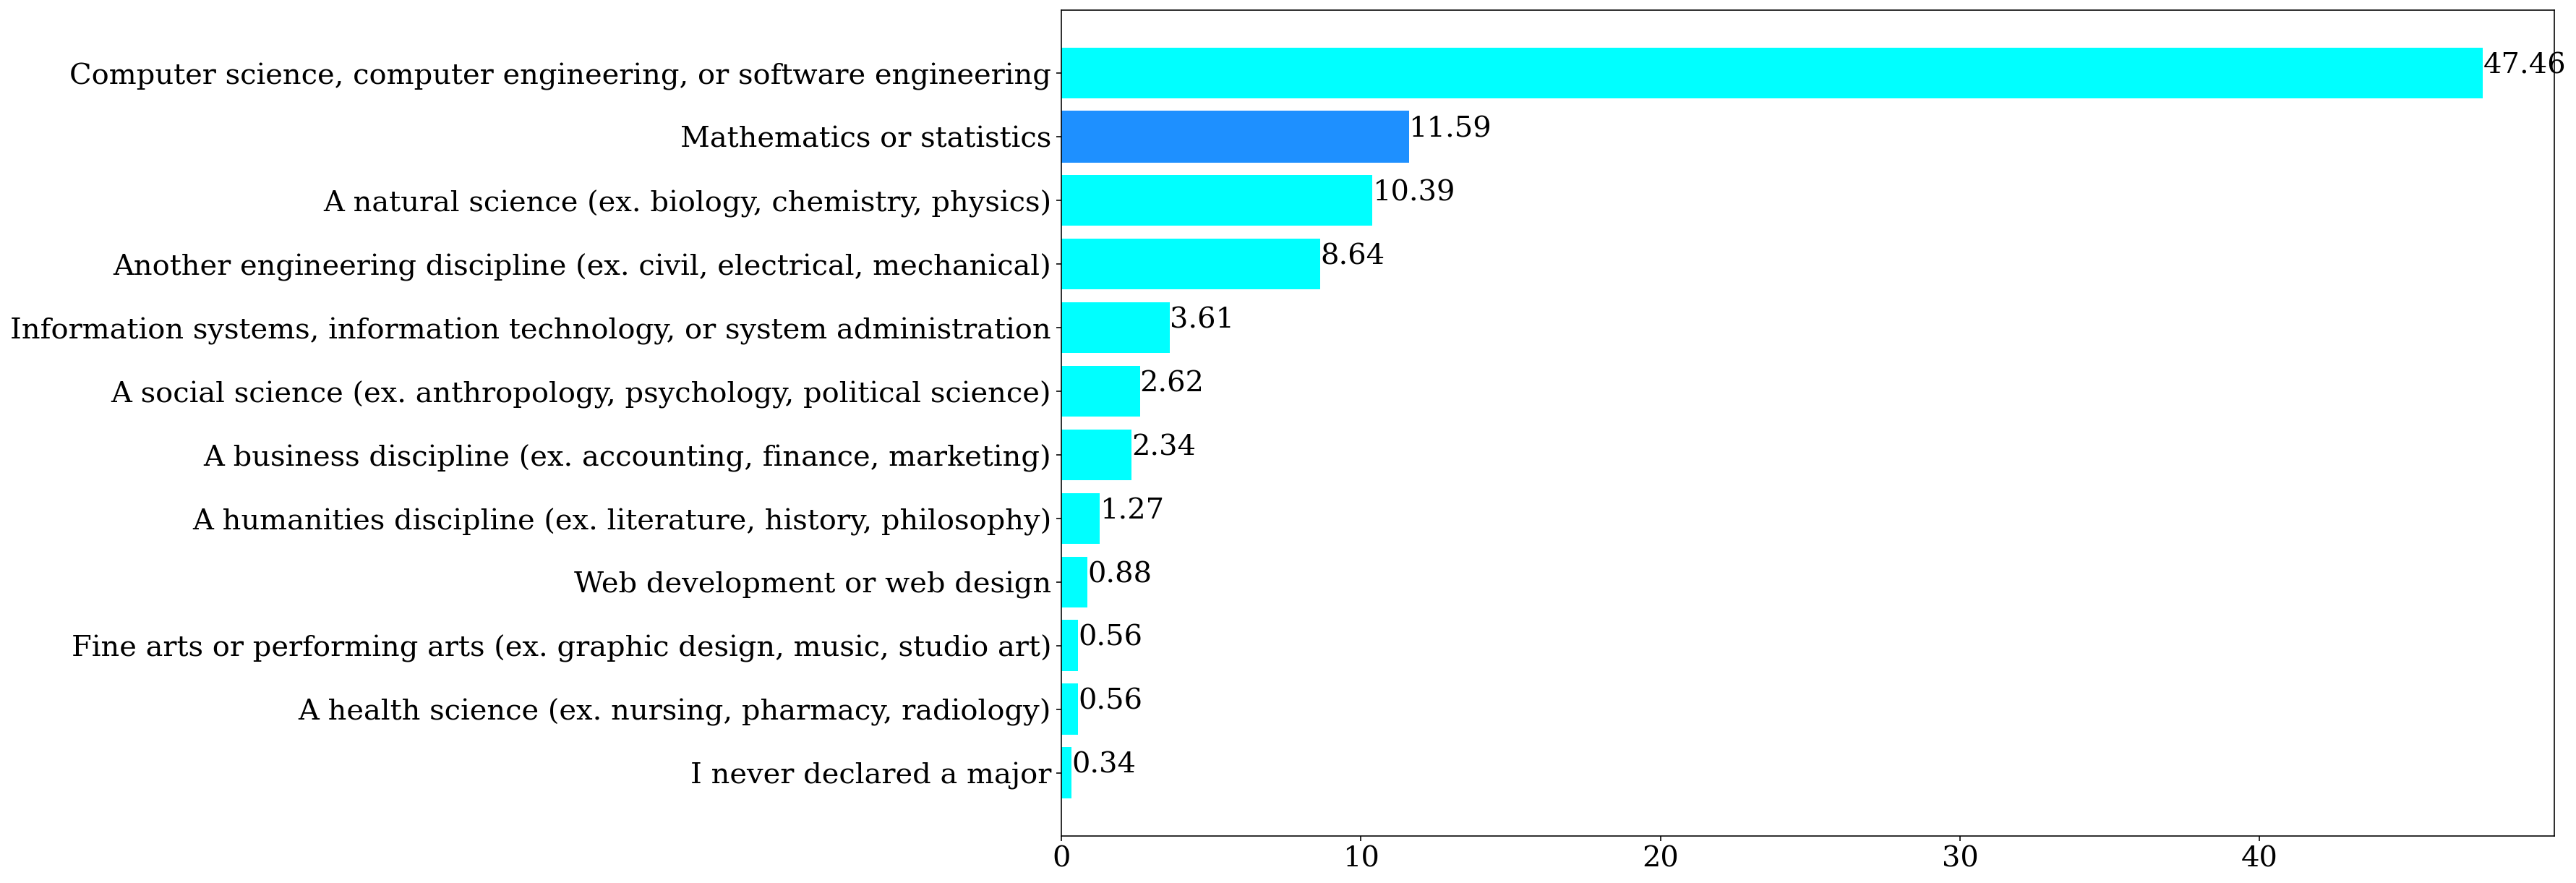

In [63]:
job_df = get_dummy(ds_ml_df,'UndergradMajor')
help_ploting(job_df,10)

Text(0.5, 0, 'percentage')

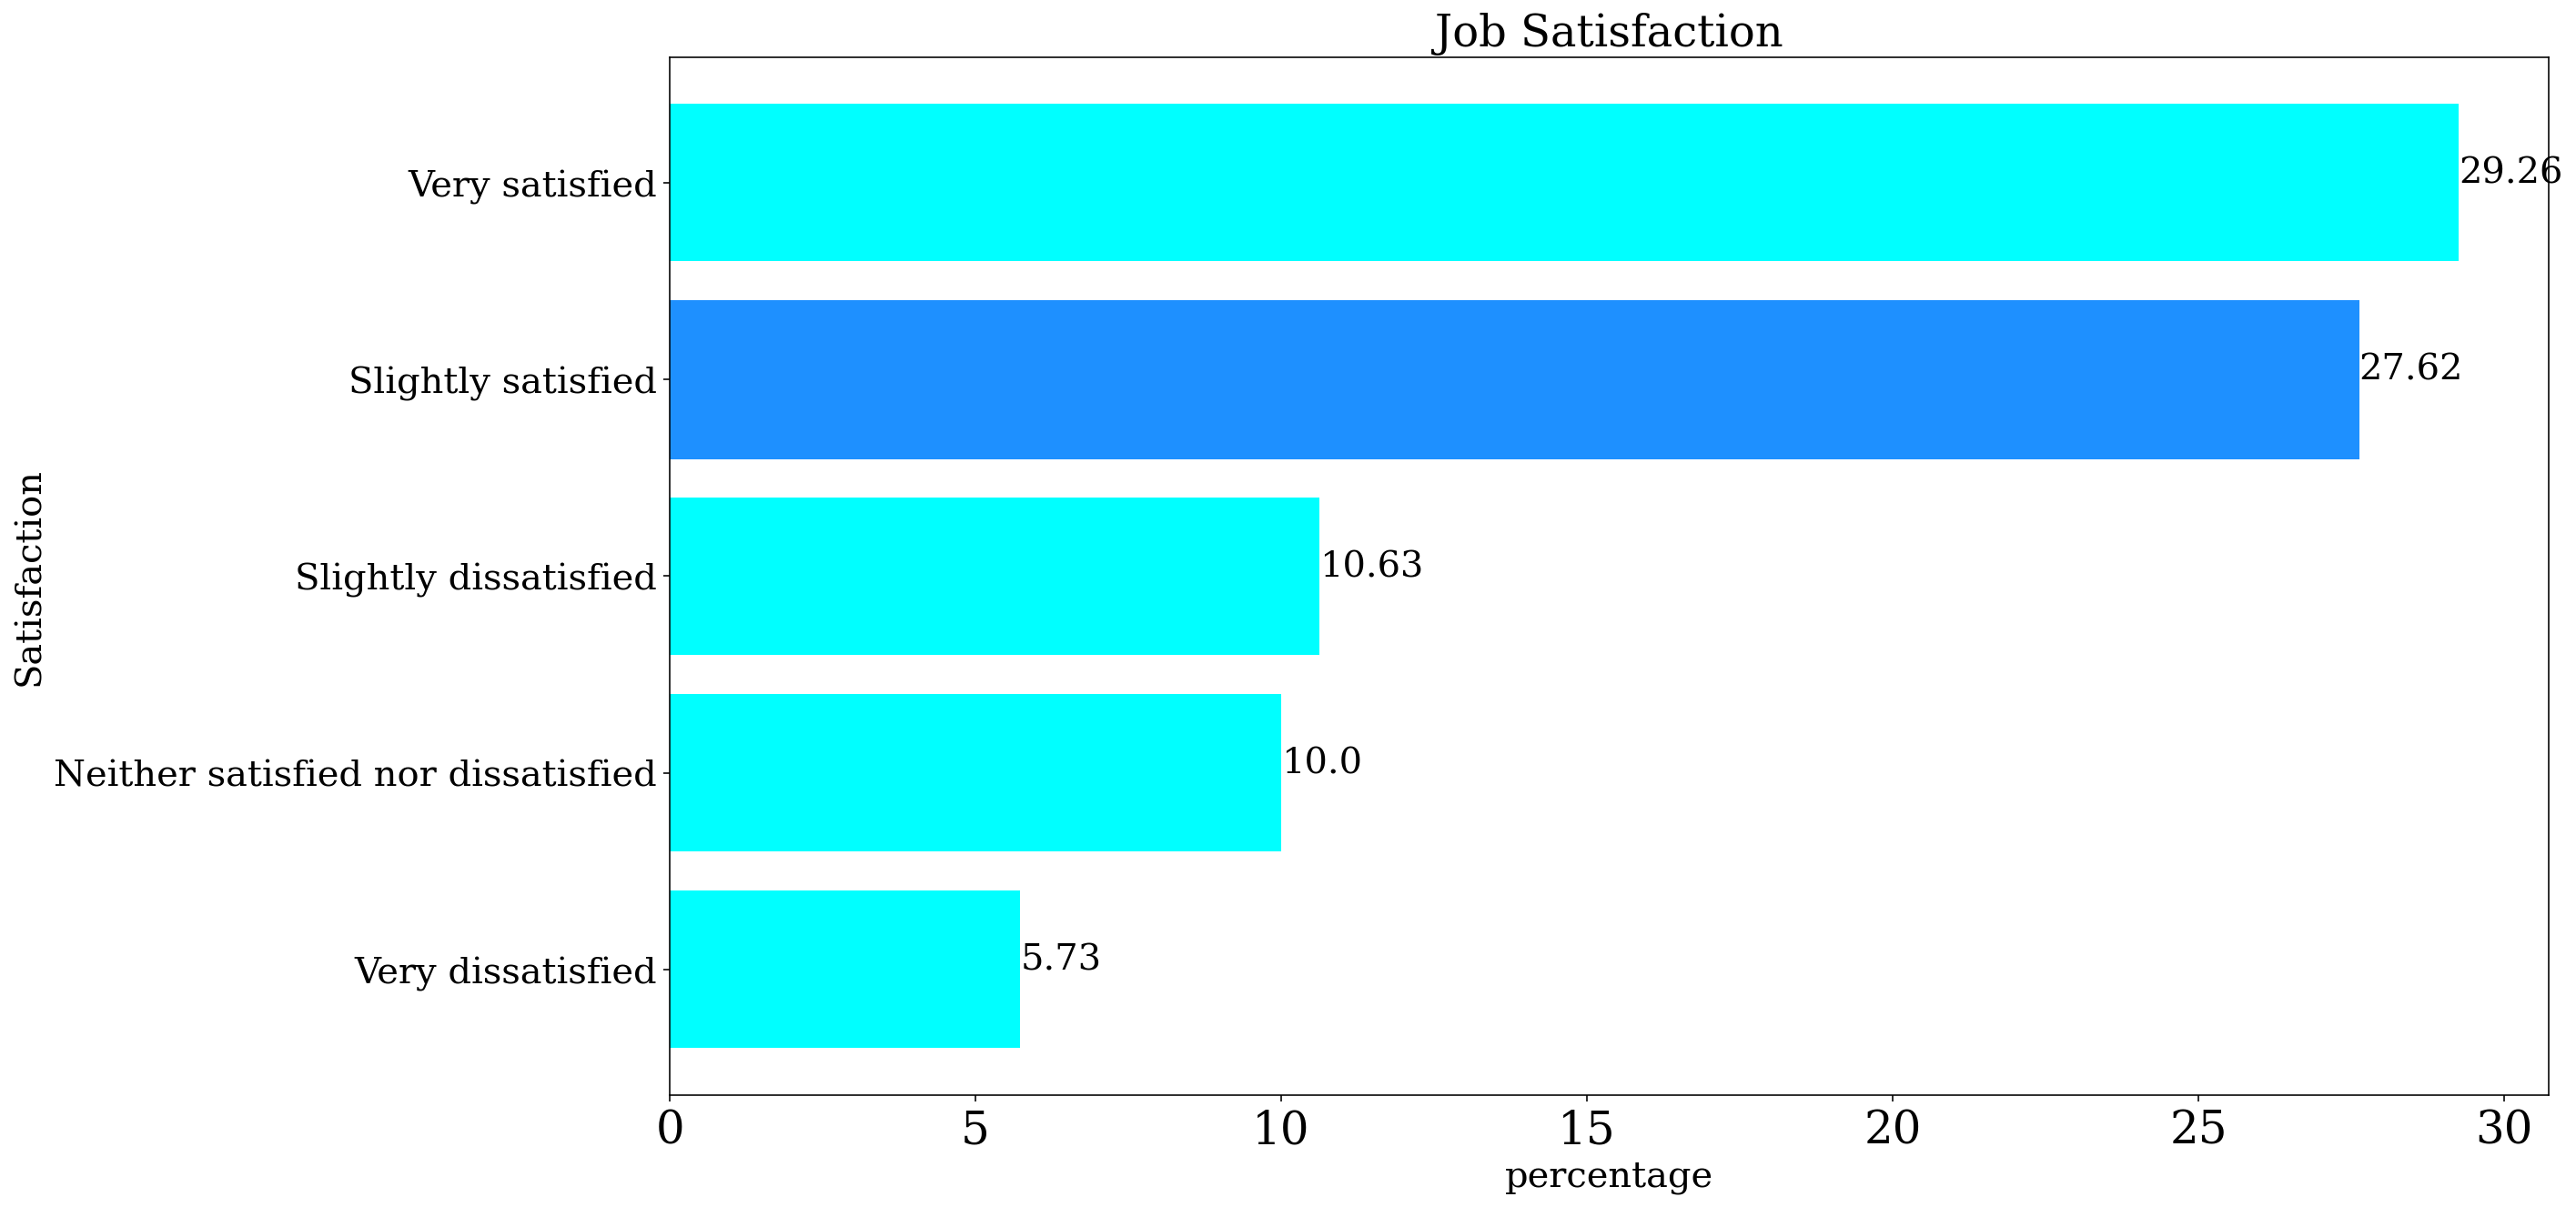

In [39]:
job_df = get_dummy(ds_ml_df,'JobSat')
help_ploting(job_df,3)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 20
plt.title("Job Satisfaction")
plt.xticks(fontsize=25)
plt.ylabel("Satisfaction")
plt.xlabel("percentage")

Text(0.5, 0, 'percentage')

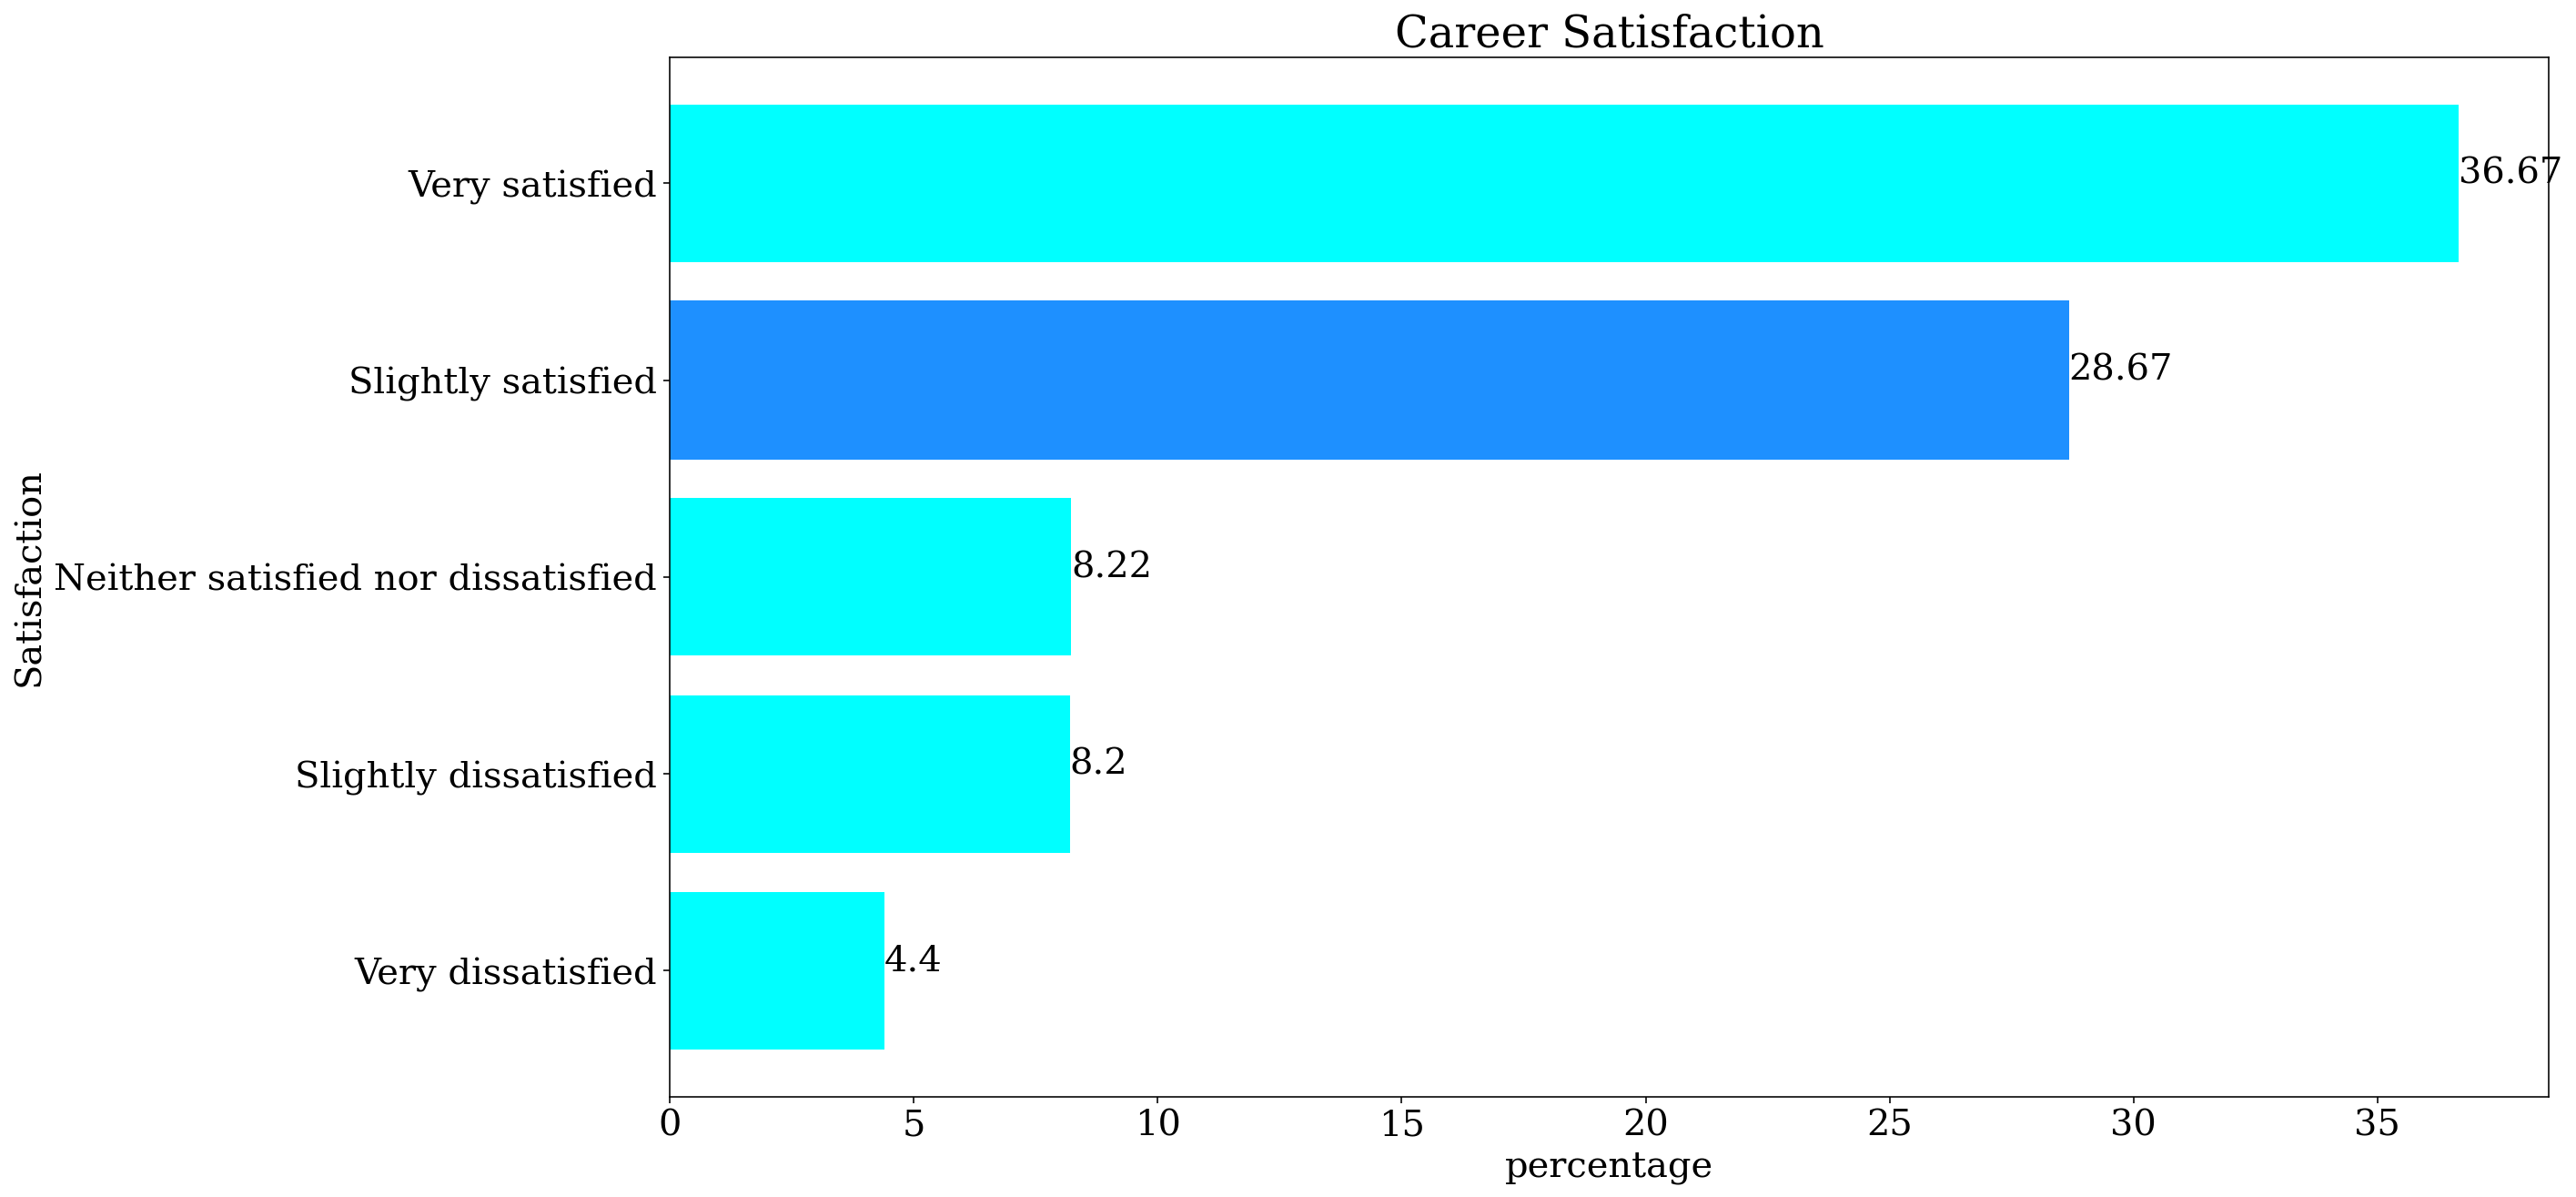

In [40]:
job_df = get_dummy(ds_ml_df,'CareerSat')
help_ploting(job_df,3)
plt.title("Career Satisfaction")
plt.ylabel("Satisfaction")
plt.xlabel("percentage")

Why are these Data Scientist or ML Specialist satisfied with their jobs?

Text(0.5, 1.0, 'Habit of Code')

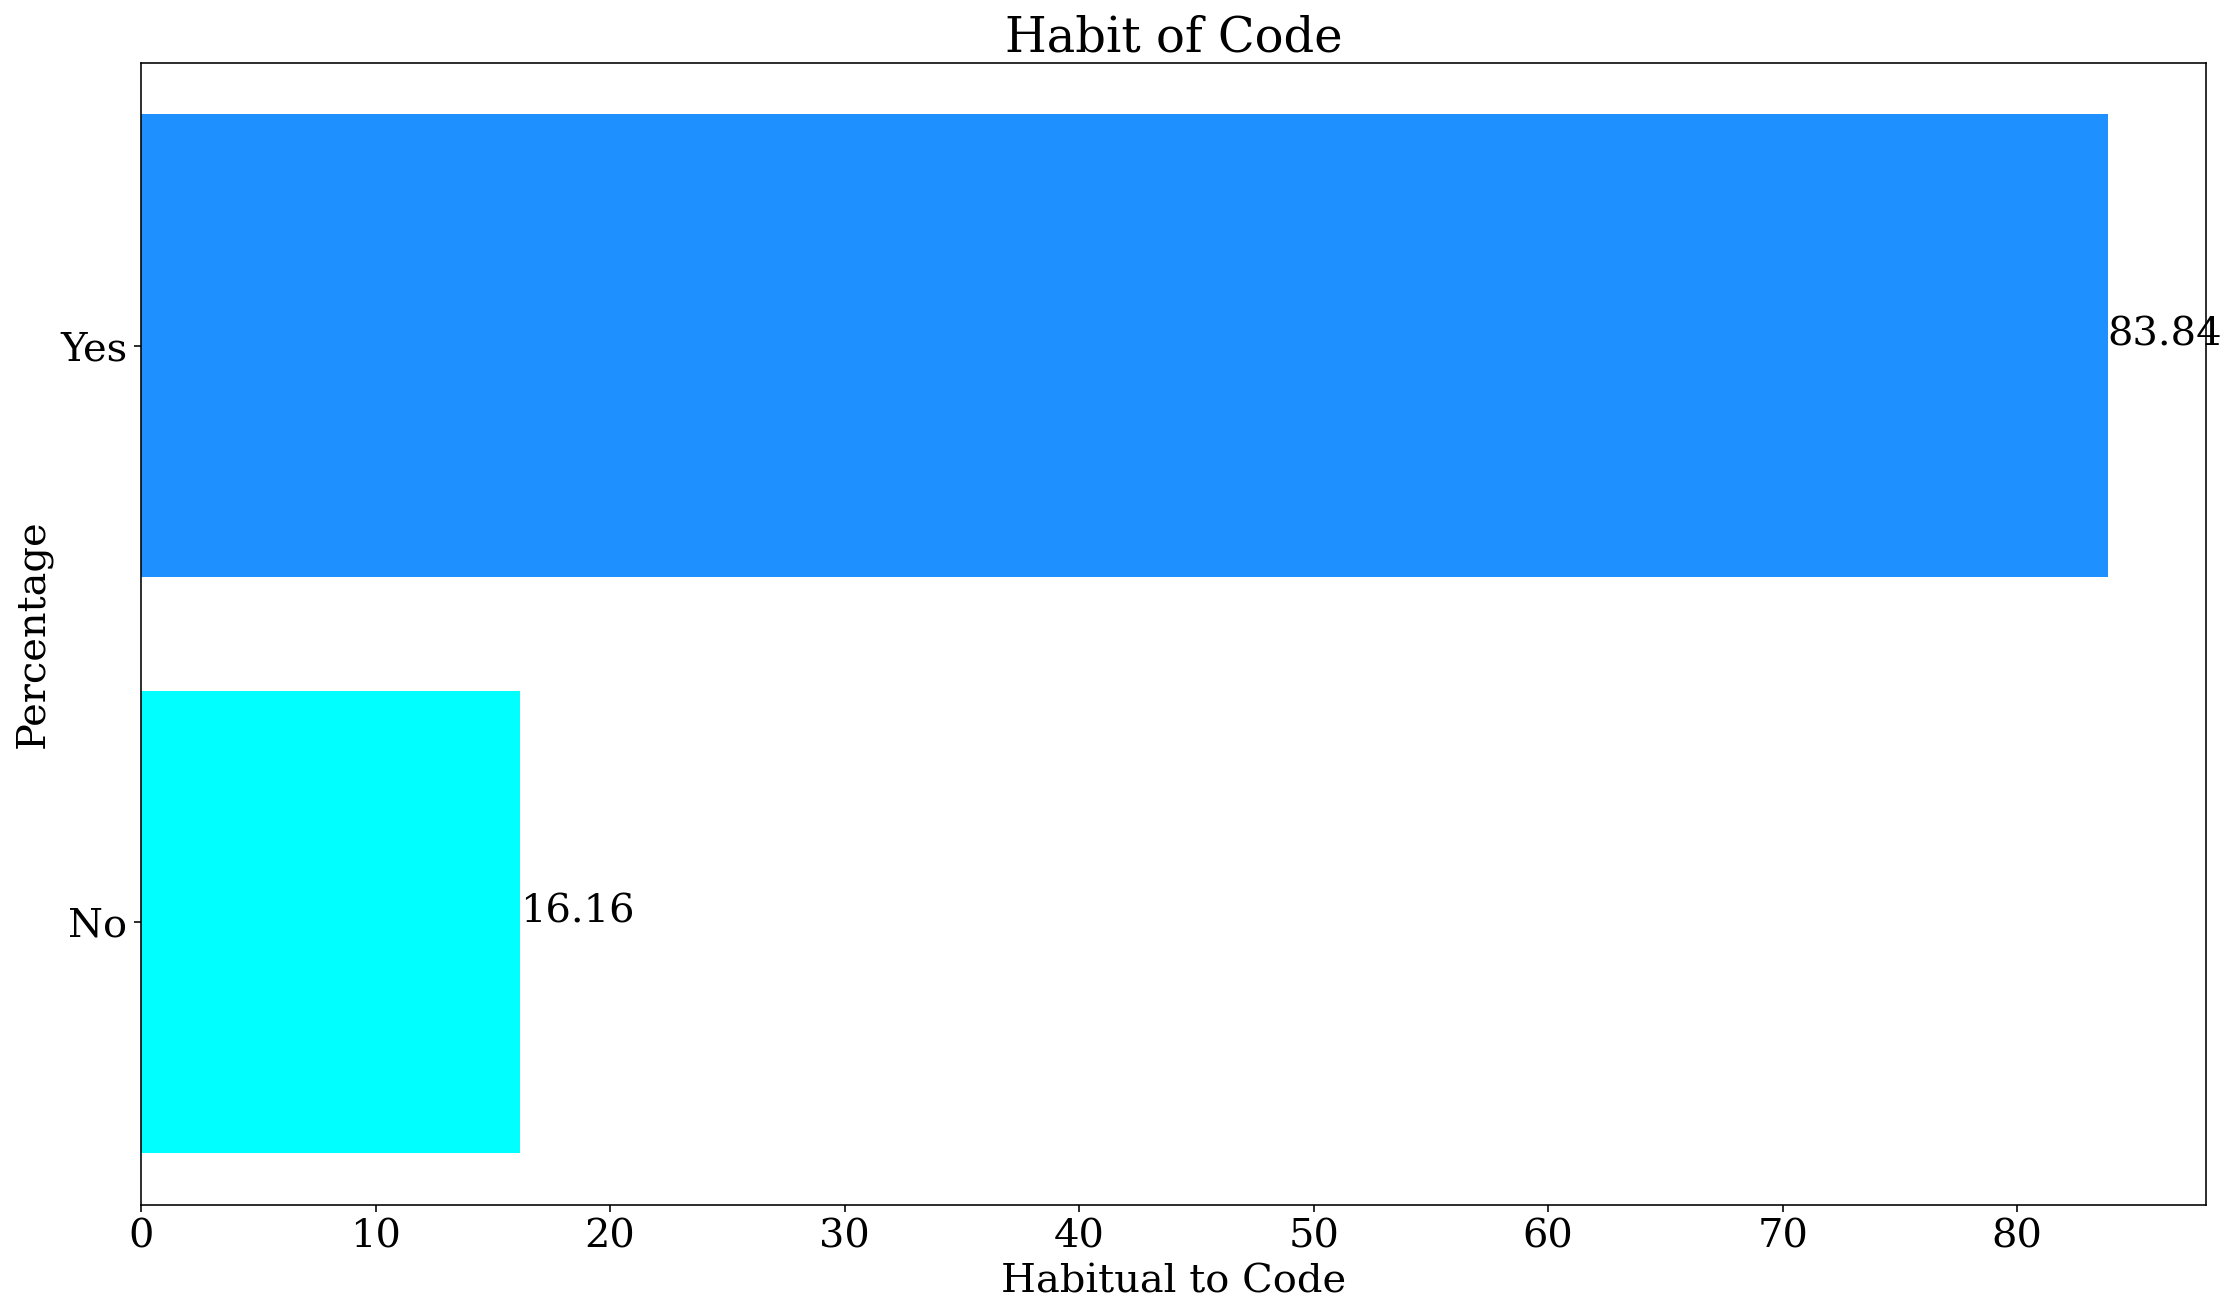

In [41]:
job_df = get_dummy(ds_ml_df,'Hobbyist')
help_ploting(job_df,1)
plt.xlabel("Habitual to Code")
plt.ylabel("Percentage")
plt.title("Habit of Code")

Data Scientist or Machine learning engineer to Open Source.

Text(0.5, 1.0, 'Open Source')

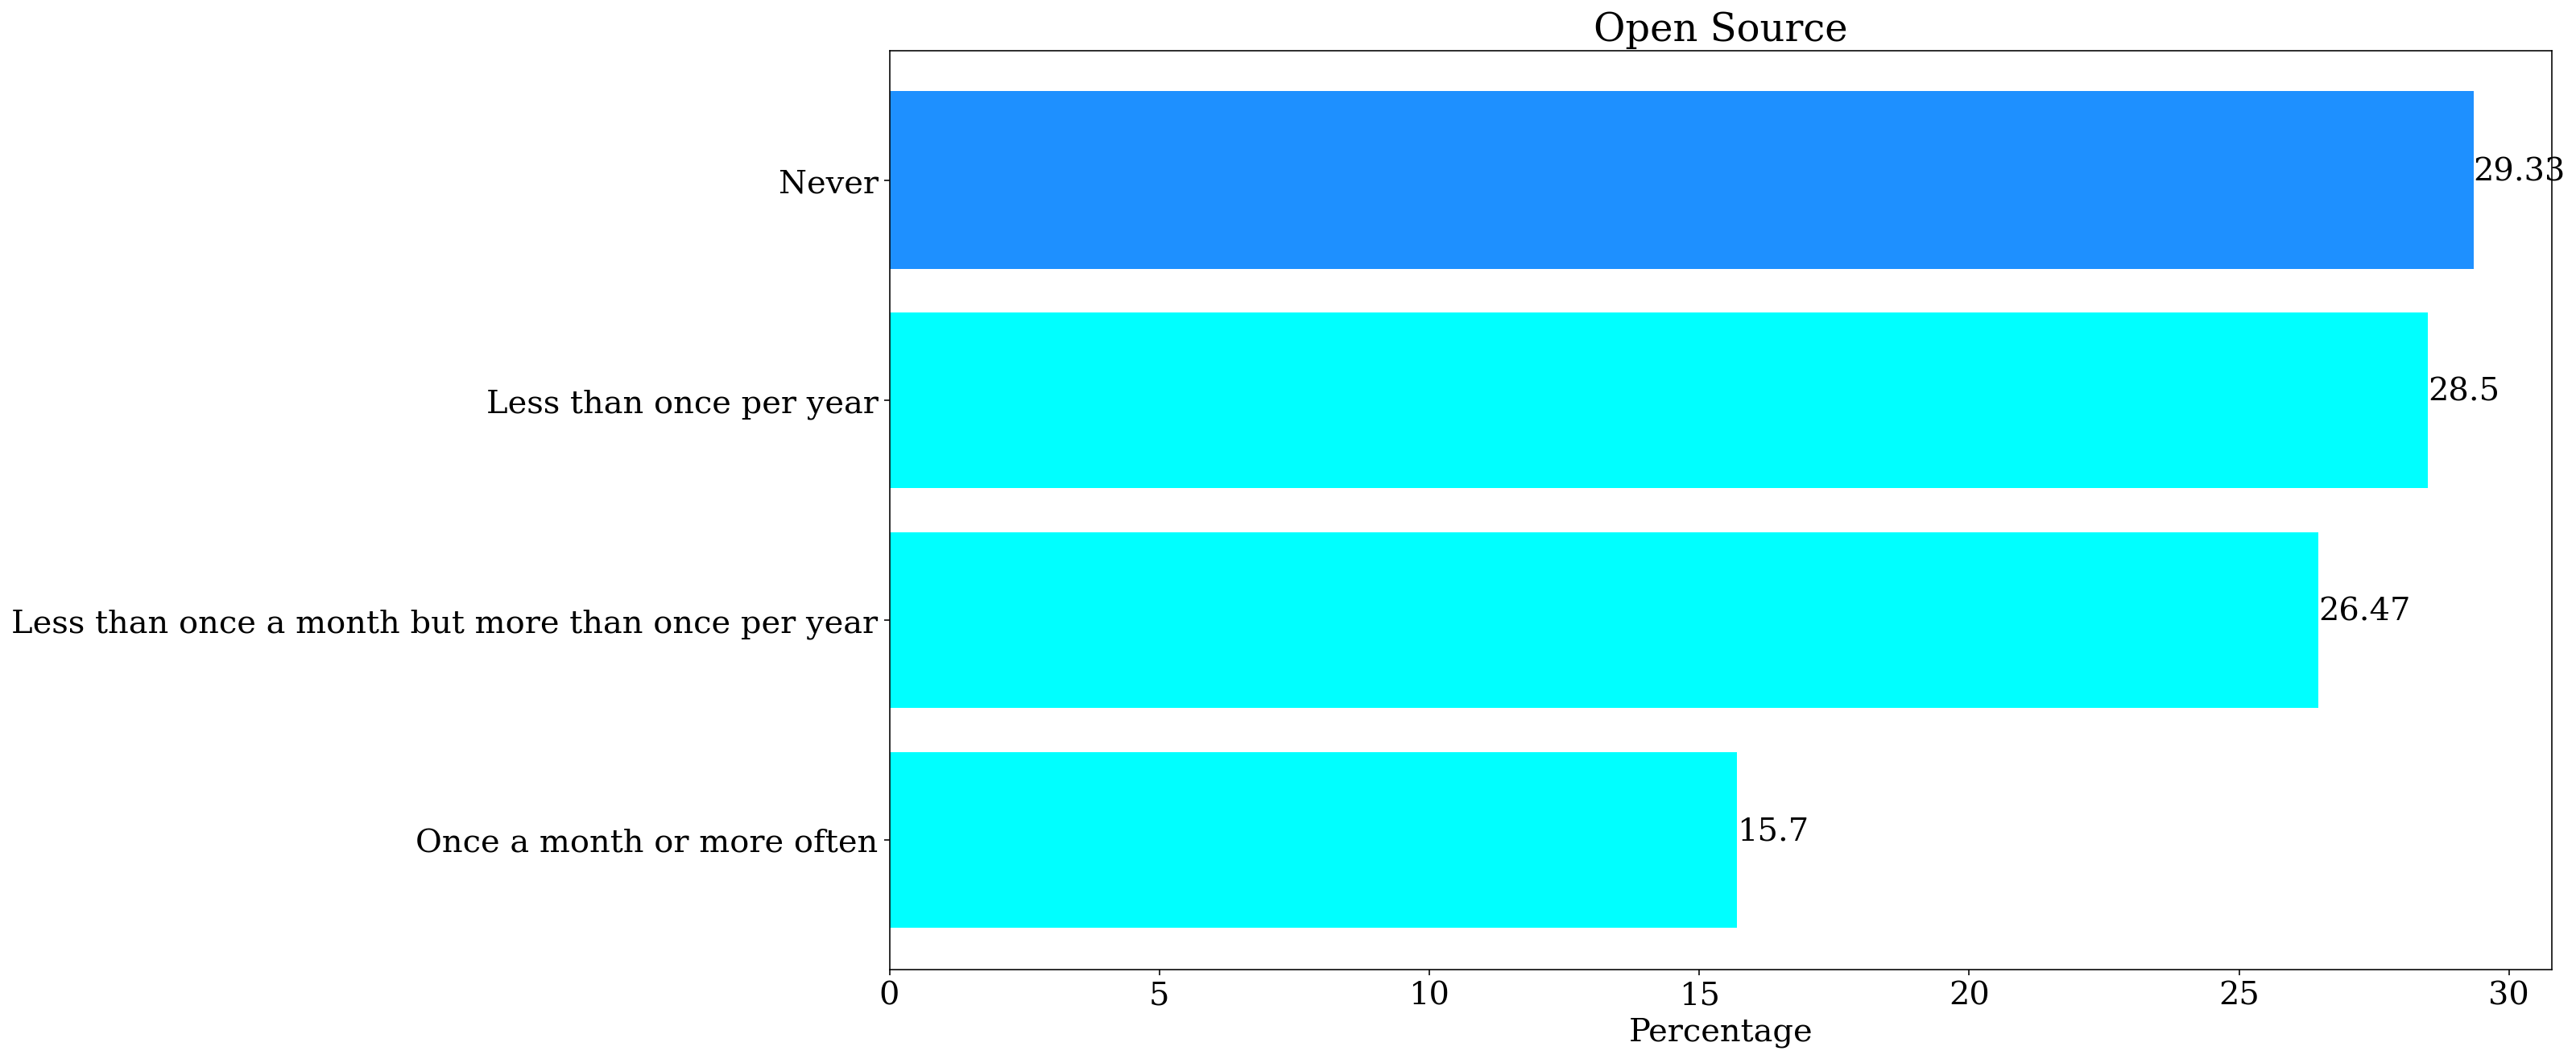

In [48]:
open_df = get_dummy(ds_ml_df,'OpenSourcer')
help_ploting(open_df,3)
plt.xlabel("Percentage")
plt.title("Open Source")

In [0]:
x = np.array(ds_ml_df['WorkWeekHrs'])

Text(0.5, 1.0, 'Developer Work Distribution')

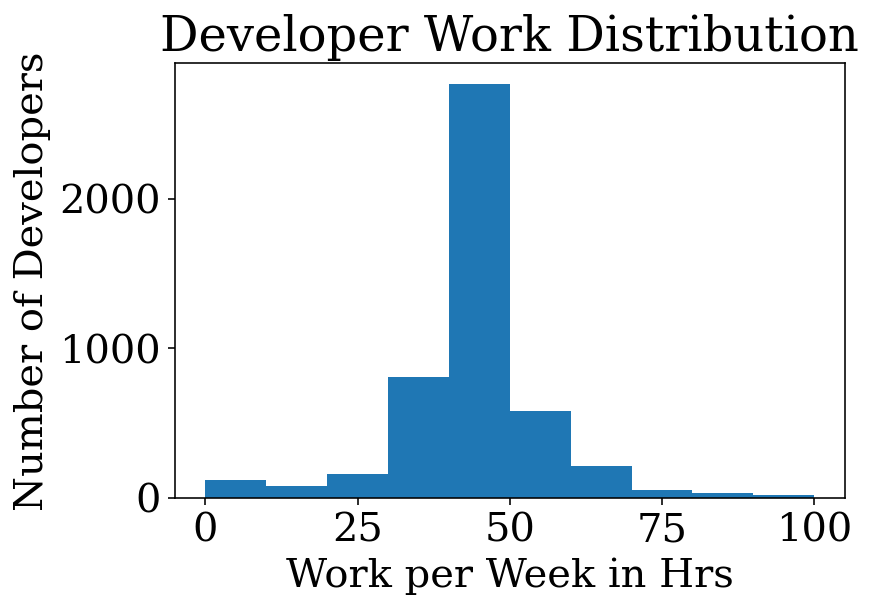

In [62]:
plt.hist(x, range=[0,100],bins= [0,10,20,30,40,50,60,70,80,90,100]);
plt.ylabel("Number of Developers")
plt.xlabel("Work per Week in Hrs")
plt.title("Developer Work Distribution")

In [86]:
ds_ml_df.shape

(6460, 85)